<a href="https://colab.research.google.com/github/SamuelGuerrero/Machine-Learning/blob/main/Lineal%20Regression%20-%20Boston%20House%20Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import boston_housing        #Para importar los datos de boston:housing
import numpy as np                               #Para la manipulación de matrices
import random                                    #Para los índices
import pandas as pd                              #Para tablas estadísticas
from keras.layers import Dense, Activation       #Para la estructura de la red
from keras.models import Sequential              #Para la estructura de la red
from sklearn.preprocessing import StandardScaler #Para la estandarización 
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split

In [ ]:
#Carga de los datos y separación en entrenamiento y test
(X_train, Y_train), (X_test, Y_test) = boston_housing.load_data()
X_test, X_valid,Y_test, Y_valid = train_test_split(X_test, Y_test, test_size=0.50, random_state=42)
print(f'El conjunto de entrenamiento tiene {X_train.shape[0]} datos con {Y_train.shape[0]} etiquetas')
print(f'El conjunto de pruebas tiene {X_test.shape[0]} datos con {Y_test.shape[0]} etiquetas')
print(f'El conjunto de validación tiene {X_valid.shape[0]} datos con {Y_valid.shape[0]} etiquetas')

El conjunto de entrenamiento tiene 404 datos con 404 etiquetas
El conjunto de pruebas tiene 51 datos con 51 etiquetas
El conjunto de validación tiene 51 datos con 51 etiquetas


In [ ]:
#Se imprimen solamente las etiquetas de los datos de entrenamiento y prueba
print("Etiquetas de los datos de entrenamiento")
print(Y_train)
print("Etiquetas de los datos de prueba")
print(Y_test)
print("Etiquetas de los datos de validación")
print(Y_valid)

Etiquetas de los datos de entrenamiento
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  

In [ ]:
#Se imprimen los datos de entrenamiento para analizar sus valores
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
tabla = pd.DataFrame(X_train,columns=column_names)
tabla

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [ ]:
mms = StandardScaler()
mms.fit(X_train)

X_train_norm = mms.transform(X_train)
X_test_norm  = mms.transform(X_test)
X_valid_norm  = mms.transform(X_valid)

In [ ]:
tablaNormalizada = pd.DataFrame(X_train_norm,columns=column_names)
tablaNormalizada

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.381973,-0.483615,-0.616568,-0.256833,-0.933487,-0.938177,-0.251223,1.157680,-0.741356,-1.040501,-0.262093,0.448077,0.477421
400,-0.388221,0.358906,-0.609218,-0.256833,-0.796907,-0.038202,-1.888860,0.339660,-0.741356,-1.100681,0.056428,0.448077,-0.848908
401,-0.402030,0.990797,-0.741515,-0.256833,-1.019702,-0.333021,-1.638018,1.430403,-0.971569,-0.613224,-0.717123,0.079439,-0.677769
402,-0.172920,-0.483615,1.245881,-0.256833,2.677335,-0.787241,1.056737,-1.044075,-0.511142,-0.017443,-1.718189,-0.987644,0.420835


In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation= 'relu'))
model.add(Dense(64, activation= "relu"))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])

In [ ]:
model.fit(X_train_norm, Y_train, epochs=500, validation_split=0.2,verbose=2,validation_data=(X_valid_norm, Y_valid))

Epoch 1/500
11/11 - 1s - loss: 523.2366 - mae: 20.9484 - val_loss: 522.5690 - val_mae: 20.9943 - 725ms/epoch - 66ms/step
Epoch 2/500
11/11 - 0s - loss: 419.3367 - mae: 18.3827 - val_loss: 416.6363 - val_mae: 18.3603 - 40ms/epoch - 4ms/step
Epoch 3/500
11/11 - 0s - loss: 318.8909 - mae: 15.5906 - val_loss: 304.6962 - val_mae: 15.2109 - 58ms/epoch - 5ms/step
Epoch 4/500
11/11 - 0s - loss: 216.8518 - mae: 12.5416 - val_loss: 204.9781 - val_mae: 11.9988 - 39ms/epoch - 4ms/step
Epoch 5/500
11/11 - 0s - loss: 136.6785 - mae: 9.4971 - val_loss: 130.6584 - val_mae: 9.0080 - 38ms/epoch - 3ms/step
Epoch 6/500
11/11 - 0s - loss: 84.2332 - mae: 7.1412 - val_loss: 76.3445 - val_mae: 6.6777 - 43ms/epoch - 4ms/step
Epoch 7/500
11/11 - 0s - loss: 52.7804 - mae: 5.4631 - val_loss: 56.4218 - val_mae: 5.6622 - 46ms/epoch - 4ms/step
Epoch 8/500
11/11 - 0s - loss: 40.7432 - mae: 4.7026 - val_loss: 41.7055 - val_mae: 4.8705 - 39ms/epoch - 4ms/step
Epoch 9/500
11/11 - 0s - loss: 31.7048 - mae: 4.0137 - val_l

In [ ]:
print(model.evaluate(X_test_norm, Y_test))
print(model.metrics_names)

2/2 [==============================] - 0s 6ms/step - loss: 12.4847 - mae: 2.3637
[12.484703063964844, 2.3636817932128906]
['loss', 'mae']


In [ ]:
index = random.randint(0,(X_test.shape[0]))
predictions = model.predict(X_test_norm)
print(predictions[index])
print(Y_test[index])

[22.170181]
21.5


In [ ]:
Y_test = Y_test.reshape(51,1)
print(Y_test.shape)
print(predictions.shape)

(51, 1)
(51, 1)


In [ ]:
valoresTabla = np.append(Y_test,predictions, axis=1)
print(valoresTabla.shape)

(51, 2)


In [ ]:
column_names = ['Valor real', 'Valor de la predicción']
df_xtrain = pd.DataFrame(valoresTabla,columns=column_names)
df_xtrain

,Valor real,Valor de la predicción
0,25.0,23.469109
1,50.0,43.240700
2,20.9,19.524330
3,27.0,28.180632
4,19.8,20.681183
5,20.1,15.291129
6,20.5,18.912754
7,24.3,22.396389
8,31.2,28.833950
9,13.0,14.138902


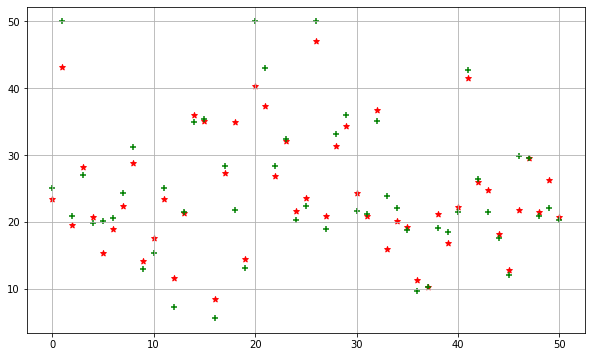

In [ ]:
import matplotlib.pyplot as plt
ejeY = np.linspace(0,(50),51)

plt.scatter(ejeY,predictions, color='r', marker='*')
plt.scatter(ejeY,Y_test, color='g', marker='+')
plt.grid()